In [13]:
import os
print(os.listdir())

['.ipynb_checkpoints', 'bike sharing hour.csv', 'LICENSE', 'Linear Regression.ipynb']


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [3]:
#function to find best fit slope (weight) and y-intercept (bias), derivation of this formula was done in class
def best_fit_slope_intercept(xs,ys):
    theta = (((np.mean(xs)*np.mean(ys)) - 
              np.mean (xs*ys))/
         ((np.mean(xs)**2)-np.mean(xs**2)))
    #np.mean function gives mean of all the numbers in an np array
    b = np.mean(ys) - theta*np.mean(xs)
    return theta,b

In [4]:
df = pd.read_csv('bike sharing hour.csv')
#list(df)
df.drop(['dteday'],axis=1,inplace = True)
df.drop(['instant'],axis=1,inplace = True)
full_data = df.astype(float).values.tolist()
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
header = list(df) #returns the names of all columns in tbe dataframe

In [6]:
header

['season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

In [7]:
header = header[-3:]

In [8]:
header

['casual', 'registered', 'cnt']

In [9]:
xs = np.array(full_data)[:,-3:-1] #Now we have to bring our data in the form of toy dataset 
#for applying best_fit_slope_intercept function
#We are only considering the last 2 columns of features here as all other features are either categorical or
#too random to apply regression on (i.e they dont follow a specific shape)
ys = np.array(full_data)[:,-1]

In [10]:
xs #17379 rows and 2 columns

array([[ 3., 13.],
       [ 8., 32.],
       [ 5., 27.],
       ...,
       [ 7., 83.],
       [13., 48.],
       [12., 37.]])

In [11]:
ys.shape #gives the number of rows and colums in a 2D array and number of rows in a 1D array
#Experiment with this function a lot so that you understand all the different types of shapes your data can assumee.
#This function is really helpful while dealing with Image and Audio Data

(17379,)

2.555222246702297 98.3024206379183


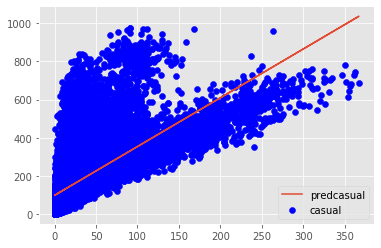

1.1650320363746498 10.296458231132732


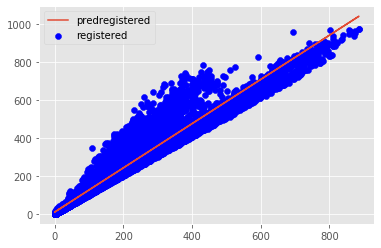

In [12]:
for i in range(0,len(xs[0])):
    theta1,b1 = best_fit_slope_intercept(xs[:,i],ys)
    print(theta1,b1)
    plt.scatter(xs[:,i],ys,label = 
                header[i],color = 'b') #Since I only took columns -3 and -2
    #i have to label my line and scatter plot points as such thus I manipulated the slicing of my header list
    plt.plot(xs[:,i],theta1*xs[:,i]+b1,label = 
             'pred' + header[i])
    plt.legend(loc = 'best') #Gives the legend to the graph for better understanding during analysis
    #plt.savefig('plot_'+header[-3+i]+'.png') #Saves the graph in the notebook folder as png file
    plt.show() #Shows the graph